## Logisticc Regression with multiple factors

### Raise up problem


We could not ensure someone pass or fail an exam just through their study time. If we have 1 more factor: concentration ability (unit: hours/day). How could we evaluate the probability of passing or failing an exam?

### Two ways to go


#### A natural way of thinking

If we call the probability of passing the exam just basing on study time only is $prob_1$ and basing on concentration ability is $prob_2$. Then we have the probability for passing the exam basing on both factors is:

$prob = prob_1 * prob_2$

This call Bayesion model, mostly use probability.

#### The second way - Machine Learning

Now thinking similarity to what we have done with 1 factor, we will have a solution for 2 factors.

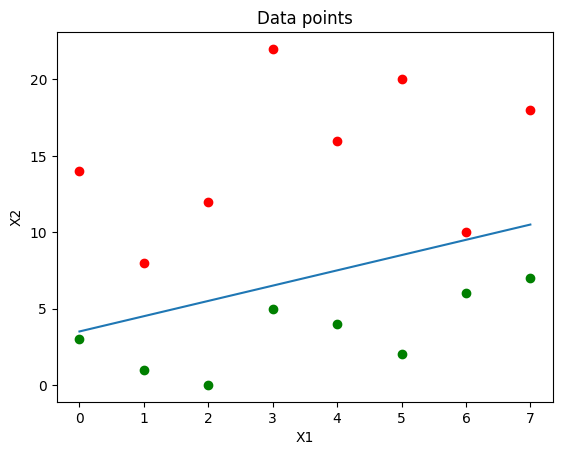

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Draw a graph with multiple dots red and green
def draw_points(x1, x2, x1_label, x2_label, title, color):
    plt.plot(x1, x2, 'o', color=color)
    plt.xlabel(x1_label)
    plt.ylabel(x2_label)
    plt.title(title)

def draw_line(a, b):
    x = np.linspace(0, 7, 100)
    y = a * x + b
    plt.plot(x, y, label='y={a}x+{b}'.format(a=a, b=b))

draw_points([0, 1, 2, 3, 4, 5, 6, 7], [14, 8, 12, 22, 16, 20, 10, 18], 'X1', 'X2', 'Data points', "red")
draw_points([0, 1, 2, 3, 4, 5, 6, 7],[3, 1, 0, 5, 4, 2, 6, 7],"X1", "X2", "Data points", "green")
draw_line(1, 3.5)
plt.show()

### Problem Formulation

If we are given data $(x_i, y_i, z_i)$ which:
- $x_i$ is the hours of studying for the exam.
- $y_i$ is the hours of concentration per day (represent the concentration ability).
- $z_i$ including value 0 and 1 only that 0 is fail and 1 is pass.

#### Solving the data
Look at the graph below, clearly we could draw a line to clasify 2 groups of data (pass or fail). 
If the line is $y = ax + b$, we can come up with some ideas:
- For data points $(x_i, y_i)$ that $y_i - ax_i - b > 0$, $z_i = 1$ and vice versa (ngược lại).
- The further the data point from the line is, the more likely that student can pass/fail the exam.

#### Notice
But what is the exact distance between data point and line?
- Đoạn thẳng kẻ từ điểm dữ liệu vuông góc xuống đường thẳng $y = ax + b$ OR
- Đoạn thẳng kẻ từ điểm dữ liệu, vuông gốc trục Ox đến đường thẳng $y = ax + b$

The answer is, we could use BOTH according to the ratio. But for easier calculation, we should choose the latter.

### Loss Function and Derivatives

#### Loss Function
$L(a,b,c) = \sum_{i = 1}^n (-z_i.ln(\sigma(ax_i + by_i + c)) - (1 - z_i).ln(1 - \sigma(ax_i + by_i +c)))$

#### Derivatives
$\frac{\partial L}{\partial a} = \sum_{i = 1}^n (-z_i\frac{d\sigma(ax_i + by_i + c)}{d(ax_i + by_i +c)}\frac{d(ax_i + by_i +c)}{da} - (1 - z_i)\frac{d(1-\sigma(ax_i + by_i + c))}{d(ax_i + by_i +c)}\frac{d(ax_i + by_i +c)}{da})$

$ = \sum_{i = 1}^n (-z_i\frac{\sigma(ax_i + by_i + c)(1-\sigma(ax_i + by_i + c))}{\sigma(ax_i + by_i + c)}\frac{d(ax_i + by_i +c)}{da} $

$ - (1 - z_i)\frac{-\sigma(ax_i + by_i + c)(1-\sigma(ax_i + by_i + c))}{1-\sigma(ax_i + by_i + c)}\frac{d(ax_i + by_i +c)}{da})$

$ = \sum_{i = 1}^n (-z_ix_i(1- \sigma(ax_i + by_i + c)) - (1 - z_i)x_i(-\sigma(ax_i + by_i + c)))$

$ = \sum_{i = 1}^n -x_i(z_i - z_i\sigma(ax_i + by_i + c) -  \sigma(ax_i + by_i + c) + z_i\sigma(ax_i + by_i + c))$

$ = \sum_{i = 1}^n -x_i(z_i - \sigma(ax_i + by_i + c))$

Similarly, we have derivatives for b and c as following:

$\frac{\partial L}{\partial b} = \sum_{i = 1}^n -y_i(z_i - \sigma(ax_i + by_i + c))$

$\frac{\partial L}{\partial c} = \sum_{i = 1}^n -(z_i - \sigma(ax_i + by_i + c))$